In [1]:
# Libraries

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from uns_package.PCA import PCA # Importing PCA from personal package
import numpy as np

## 5. Train a naive logistic regression on raw MNIST images to distinguish between 0s and 8s. We are calling this our baseline. What can you tell about the baseline performance?

Loading the MNIST dataset

In [2]:
mnist = fetch_openml('mnist_784')

c:\Users\user\pyEnviroments\pymlii\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
# Reading the keys from mnist variable
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Visualizing a sample of the data

In [4]:
# Visualizing a sample of the data
data = mnist['data']
data['target'] = mnist['target'].values
data.head()

C:\Users\user\AppData\Local\Temp\ipykernel_11460\1117812876.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['target'] = mnist['target'].values


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


Following instructions in the lab, i selected all categories except 9

In [5]:
data = data[data['target'] != '9']
data['target'].unique()

['5', '0', '4', '1', '2', '3', '6', '7', '8']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [6]:
# Visualizing shape of data
data.shape

(63042, 785)

Plotting some images in the dataset

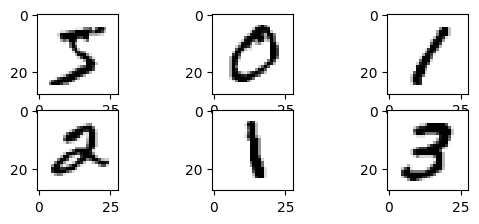

In [7]:
image= data.drop(columns=['target']).to_numpy()
plt.subplot(431)
plt.imshow((image[0].reshape(28,28)), cmap=plt.cm.gray_r, 
interpolation='nearest')
plt.subplot(432)
plt.imshow(image[1].reshape(28,28), cmap=plt.cm.gray_r, 
interpolation='nearest')
plt.subplot(433)
plt.imshow(image[3].reshape(28,28), cmap=plt.cm.gray_r, 
interpolation='nearest')
plt.subplot(434)
plt.imshow(image[4].reshape(28,28), cmap=plt.cm.gray_r, 
interpolation='nearest')
plt.subplot(435)
plt.imshow(image[5].reshape(28,28), cmap=plt.cm.gray_r, 
interpolation='nearest')
plt.subplot(436)
plt.imshow(image[6].reshape(28,28), cmap=plt.cm.gray_r, 
interpolation='nearest')

In [8]:
# Droping the nan values
data = data.dropna()

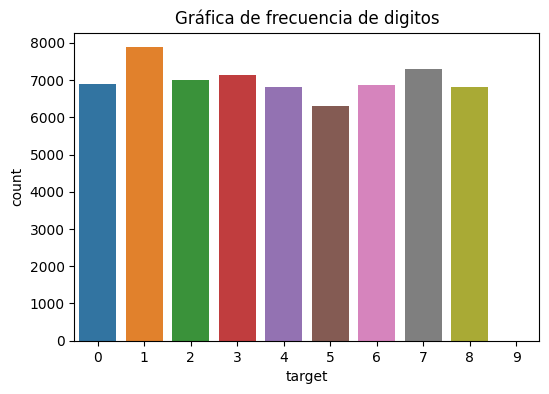

In [9]:
plt.figure(figsize=(6,4))
plt.title('Gráfica de frecuencia de digitos')
sns.countplot(data, x='target')

plt.show()

This dataset has the follow characteristics:
- Shape (63042, 785)
- Does not exists NaN values
- The target column has a stable values for all the categories

Separating the data between predictor variables X and target data Y

In [10]:
X = data.drop(columns=['target']).copy()
Y = data['target'].copy()

Standardizing data using mix max scaler

In [11]:
# standardizing variables
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)
X_norm = pd.DataFrame(X_norm, columns=X.columns)
X_norm.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,63042.0,63042.0,63042.0,63042.0,63042.0,63042.0,63042.0,63042.0,63042.0,63042.0,...,63042.000000,63042.000000,63042.000000,63042.000000,63042.000000,63042.000000,63042.0,63042.0,63042.0,63042.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000773,0.000352,0.000128,0.000056,0.000044,0.000031,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.023521,0.015852,0.009047,0.006160,0.005925,0.005454,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0


Trainig the model

In [12]:
# Spliting the data with 75% of data for train
x_train, x_test, y_train, y_test = train_test_split(
                                        X_norm,
                                        Y, 
                                        train_size   = 0.75,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

Hyperparams selected:

- multi_class =  multinomial: For classification problems for more than 2 classes (multiclass)
- solver = sag: Very efficient with large datasets

In [13]:
lr_mul_lbfgs = LogisticRegression(multi_class = "multinomial", solver='sag',  random_state=0)
lr_mul_lbfgs.fit(x_train, y_train)

c:\Users\user\pyEnviroments\pymlii\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(multi_class='multinomial', random_state=0, solver='sag')

In [14]:
# Executing the predicctions
y_pred_test = lr_mul_lbfgs.predict(x_test)
y_pred_train = lr_mul_lbfgs.predict(x_train)

Evaluating the model

In [15]:
print("===========Accuracy Logistic Regression ================")
print("test: multinomial - lbfgs : ",metrics.accuracy_score(y_test, y_pred_test))
print("train: multinomial - lbfgs : ",metrics.accuracy_score(y_train, y_pred_train))

===========Accuracy Logistic Regression ================
test: multinomial - lbfgs :  0.9337605481885667
train: multinomial - lbfgs :  0.9485839978003849


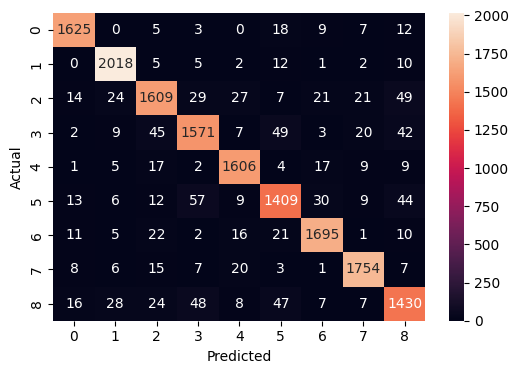

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1679
           1       0.96      0.98      0.97      2055
           2       0.92      0.89      0.91      1801
           3       0.91      0.90      0.90      1748
           4       0.95      0.96      0.95      1670
           5       0.90      0.89      0.89      1589
           6       0.95      0.95      0.95      1783
           7       0.96      0.96      0.96      1821
           8       0.89      0.89      0.89      1615

    accuracy                           0.93     15761
   macro avg       0.93      0.93      0.93     15761
weighted avg       0.93      0.93      0.93     15761



In [16]:
#Confussion Matrix
conf_mat = confusion_matrix(y_test, y_pred_test)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True
            , fmt='d'
            , xticklabels=data['target'].sort_values().unique()
            , yticklabels=data['target'].sort_values().unique()
           )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(metrics.classification_report(y_test, y_pred_test, target_names=data['target'].sort_values().unique()))

For this model we are getting a excelent performance:
- Accuracy: 0.93 in test
- Precision: 0.89 in the lower case and 0.96 in the higher
- recall: 0.89 in the lower case and 0.96 in the higher
- f1-score : 0.89 in the lower case and 0.96 in the higher

these are good results

## 6. Now, apply dimensionality reduction using all your algorithms to train the model with only 2 features per image.

Applying PCA from personal librery

In [17]:
pca = PCA(n_components=2)
pca.fit(X_norm)
mnist_reduced = pca.transform(X_norm)
mnist_reduced.shape

(63042, 2)

In [18]:
# Building a dataframe with comp_1 and comp_2 as column names
mnist_reduced = pd.DataFrame(mnist_reduced.values, columns=["comp_1", "compo_2"])
mnist_reduced.head()

,comp_1,compo_2
0,0.445411,-1.318921
1,3.969746,0.027125
2,-0.382737,1.791204
3,-3.337279,-1.289767
4,0.719775,1.641934


Plotting the generated components

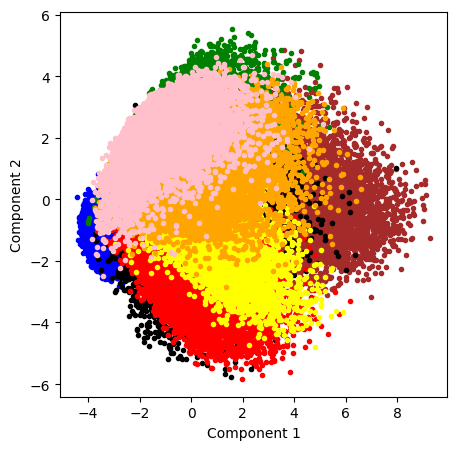

In [19]:
x_1 = mnist_reduced['comp_1']
x_2 = mnist_reduced['compo_2']
labels = np.array(Y.astype('int').values)
colors = ["brown", "blue", "black", "red", "green", "yellow" , "orange", "pink"]
fig = plt.figure(figsize = (5,5))

for j in range(8):
    plt.plot(x_1[labels == j], x_2[labels == j], '.', color = colors[j])

plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

Calculating the cumulative variance and total of the explained variance for 2 components

In [20]:
print(pca.cumulative_variance[:2])
print(np.sum(pca.cumulative_variance[:2]))

[0.10203072396932872, 0.16906690767480492]
0.27109763164413364


In [21]:
# standardizing variables
scaler = MinMaxScaler()
X_norm_pca = scaler.fit_transform(mnist_reduced)
X_norm_pca = pd.DataFrame(mnist_reduced, columns=mnist_reduced.columns)
X_norm_pca.describe()

,comp_1,compo_2
count,6.304200e+04,6.304200e+04
mean,-1.082010e-16,1.442681e-17
std,2.334887e+00,1.892584e+00
min,-4.411418e+00,-5.842767e+00
25%,-1.571410e+00,-1.294764e+00
50%,-1.532833e-01,-1.007697e-01
75%,1.363079e+00,1.451818e+00
max,9.261055e+00,5.523473e+00


Training the model

In [22]:
# Spliting the data with 75% of data for train
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(
                                                                    X_norm_pca,
                                                                    Y, 
                                                                    train_size   = 0.75,
                                                                    random_state = 1234,
                                                                    shuffle      = True
                                                                   )

I´m gonna to select the same hyperparams in the previous point

In [23]:
lr_mul_lbfgs_pca = LogisticRegression(multi_class = "multinomial", solver='sag',  random_state=1234)
lr_mul_lbfgs_pca.fit(x_train_pca, y_train_pca)

LogisticRegression(multi_class='multinomial', random_state=1234, solver='sag')

In [24]:
# Calculating the predictions
y_pred_test_pca = lr_mul_lbfgs_pca.predict(x_test_pca)
y_pred_train_pca = lr_mul_lbfgs_pca.predict(x_train_pca)

Evaluating the model

In [26]:
print("===========Accuracy Logistic Regression ================")
print("test: multinomial - sag - pca : ",metrics.accuracy_score(y_test_pca, y_pred_test_pca))
print("train: multinomial - sag - pca  : ",metrics.accuracy_score(y_train_pca, y_pred_train_pca))

===========Accuracy Logistic Regression ================
test: multinomial - sag - pca :  0.4961614110779773
train: multinomial - sag - pca  :  0.49444808696939574


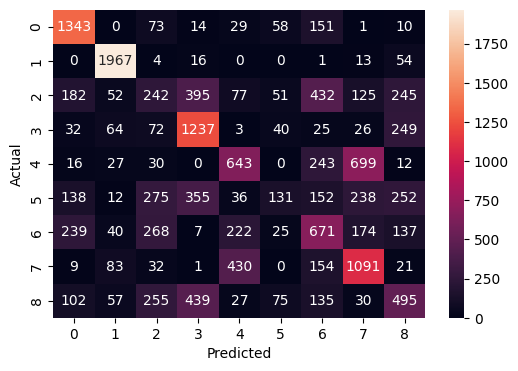

              precision    recall  f1-score   support

           0       0.65      0.80      0.72      1679
           1       0.85      0.96      0.90      2055
           2       0.19      0.13      0.16      1801
           3       0.50      0.71      0.59      1748
           4       0.44      0.39      0.41      1670
           5       0.34      0.08      0.13      1589
           6       0.34      0.38      0.36      1783
           7       0.46      0.60      0.52      1821
           8       0.34      0.31      0.32      1615

    accuracy                           0.50     15761
   macro avg       0.46      0.48      0.46     15761
weighted avg       0.47      0.50      0.47     15761



In [27]:
#Confussion Matrix
conf_mat = confusion_matrix(y_test_pca, y_pred_test_pca)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True
            , fmt='d'
            , xticklabels=data['target'].sort_values().unique()
            , yticklabels=data['target'].sort_values().unique()
           )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(metrics.classification_report(y_test_pca, y_pred_test_pca, target_names=data['target'].sort_values().unique()))

For this model we have the next performance:
- Accuracy: 0.50 in test
- Precision: 0.19 in the lower case and 0.85 in the higher
- recall: 0.13 in the lower case and 0.96 in the higher
- f1-score : 0.13 in the lower case and 0.90 in the higher

These results are much lower than in the previous model, this can be due to:
- We have only 27% of explained variance with this these components
- We need from pca good separation and compaction in the data, but, this not happen in the graph

## 7. Repeat the process above but now using the built-in algorithms in the Scikit-Learn library. How different are these results from those of your implementation? Why?

Applying PCA from scikit-learn

In [29]:
import sklearn.decomposition as sdescom
pca_slearn = sdescom.PCA(n_components = 2, random_state = 1234)
pca_slearn.fit(X_norm)
mnist_reduced_slearn = pca_slearn.transform(X_norm)
mnist_reduced_slearn.shape

(63042, 2)

In [30]:
# Building a dataframe with comp_1 and comp_2 as column names
mnist_reduced_slearn = pd.DataFrame(mnist_reduced_slearn, columns=["comp_1", "compo_2"])
mnist_reduced_slearn.head()

,comp_1,compo_2
0,0.445411,1.318940
1,3.969747,-0.027131
2,-0.382737,-1.791192
3,-3.337279,1.289770
4,0.719775,-1.641907


Plotting components

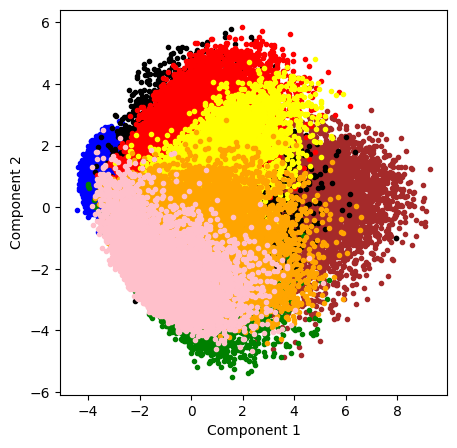

In [31]:
comp_slearn_1 = mnist_reduced_slearn['comp_1']
comp_slearn_2 = mnist_reduced_slearn['compo_2']
labels = np.array(Y.astype('int').values)
colors = ["brown", "blue", "black", "red", "green", "yellow" , "orange", "pink"]
fig = plt.figure(figsize = (5,5))

for j in range(8):
    plt.plot(comp_slearn_1[labels == j], comp_slearn_2[labels == j], '.', color = colors[j])

plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

Calculating the cumulative variance and total of the explained variance for 2 components

In [32]:
print(pca_slearn.explained_variance_ratio_)
print(np.sum(pca_slearn.explained_variance_ratio_))

[0.10203072 0.06703618]
0.16906690764252905


In [33]:
# standardizing variables
scaler = MinMaxScaler()
X_norm_pca_slearn = scaler.fit_transform(mnist_reduced_slearn)
X_norm_pca_slearn = pd.DataFrame(mnist_reduced_slearn, columns=mnist_reduced_slearn.columns)
X_norm_pca_slearn.describe()

,comp_1,compo_2
count,6.304200e+04,6.304200e+04
mean,2.380423e-16,-2.118937e-16
std,2.334887e+00,1.892584e+00
min,-4.411418e+00,-5.523478e+00
25%,-1.571410e+00,-1.451828e+00
50%,-1.532833e-01,1.007600e-01
75%,1.363079e+00,1.294752e+00
max,9.261055e+00,5.842768e+00


Trainig the model

In [34]:
# Spliting the data with 75% of data for train
x_train_pca_slearn, x_test_pca_slearn, y_train_pca_slearn, y_test_pca_slearn = train_test_split(
                                                                                                X_norm_pca_slearn,
                                                                                                Y, 
                                                                                                train_size   = 0.75,
                                                                                                random_state = 1234,
                                                                                                shuffle      = True
                                                                                                )

I´m gonna to select the same hyperparams in the previous point

In [35]:
lr_mul_lbfgs_pca_slearn = LogisticRegression(multi_class = "multinomial", solver='sag',  random_state=1234)
lr_mul_lbfgs_pca_slearn.fit(x_train_pca_slearn, y_train_pca_slearn)

LogisticRegression(multi_class='multinomial', random_state=1234, solver='sag')

In [36]:
# Calculating the prediction
y_pred_test_pca_slearn = lr_mul_lbfgs_pca_slearn.predict(x_test_pca_slearn)
y_pred_train_pca_slearn = lr_mul_lbfgs_pca_slearn.predict(x_train_pca_slearn)

Evaluating the model

In [37]:
print("===========Accuracy Logistic Regression ================")
print("test: multinomial - sag - pca_slearn : ",metrics.accuracy_score(y_test_pca_slearn, y_pred_test_pca_slearn))
print("train: multinomial - sag - pca_slearn  : ",metrics.accuracy_score(y_train_pca_slearn, y_pred_train_pca_slearn))

===========Accuracy Logistic Regression ================
test: multinomial - sag - pca_slearn :  0.4961614110779773
train: multinomial - sag - pca_slearn  :  0.49442693682451727


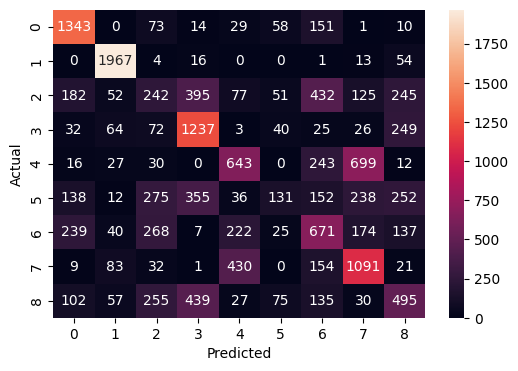

              precision    recall  f1-score   support

           0       0.65      0.80      0.72      1679
           1       0.85      0.96      0.90      2055
           2       0.19      0.13      0.16      1801
           3       0.50      0.71      0.59      1748
           4       0.44      0.39      0.41      1670
           5       0.34      0.08      0.13      1589
           6       0.34      0.38      0.36      1783
           7       0.46      0.60      0.52      1821
           8       0.34      0.31      0.32      1615

    accuracy                           0.50     15761
   macro avg       0.46      0.48      0.46     15761
weighted avg       0.47      0.50      0.47     15761



In [38]:
#Confussion Matrix
conf_mat = confusion_matrix(y_test_pca_slearn, y_pred_test_pca_slearn)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True
            , fmt='d'
            , xticklabels=data['target'].sort_values().unique()
            , yticklabels=data['target'].sort_values().unique()
           )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(metrics.classification_report(y_test_pca_slearn, y_pred_test_pca_slearn, target_names=data['target'].sort_values().unique()))

For this model we have the next performance:
- Accuracy: 0.50 in test
- Precision: 0.19 in the lower case and 0.8 in the higher
- recall: 0.13 in the lower case and 0.96 in the higher
- f1-score : 0.13 in the lower case and 0.90 in the higher

These results are much lower than in the previous model, this can be due to:
- We have only 16% of explained variance with this two components
- We need from pca good separation and compaction in the data, but, this not happen in the graph

Conclusions
- The performance of the models between my personal library and sickit learn are very similar. clearly sickit learn has more hypermarams to improve the results but basicaly both stategies got the same separation and compactation in the data for 2 components.
- With my personal library i got 27% in the total explained variance vs 16% in scikit learn, but this not show difference in the model performance